# Assignment 2

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [117]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='g', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

### Load the data into a dataframe from the csv file

In [3]:
# Ann Arbor, Michigan, United States

df = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
df = df.sort_values(["ID", "Date"])
print (df.shape)
df.head()

(165085, 4)


,ID,Date,Element,Data_Value
55067,USC00200032,2005-01-01,TMIN,-28
55102,USC00200032,2005-01-01,TMAX,67
112671,USC00200032,2005-01-02,TMAX,122
112708,USC00200032,2005-01-02,TMIN,-6
104159,USC00200032,2005-01-03,TMIN,11


In [6]:
# extracting Year and Month-Day duo from the Date column
df['Year'] = df['Date'].apply(lambda x: (x[:4]))
df['Month-Day'] = df['Date'].apply(lambda x: (x[5:]))

# removing the rows correspondng to leap year i.e., 2-29
df = df[df['Month-Day'] != '02-29']
print (df.shape)
df.head()

(165002, 6)


,ID,Date,Element,Data_Value,Year,Month-Day
55067,USC00200032,2005-01-01,TMIN,-28,2005,01-01
55102,USC00200032,2005-01-01,TMAX,67,2005,01-01
112671,USC00200032,2005-01-02,TMAX,122,2005,01-02
112708,USC00200032,2005-01-02,TMIN,-6,2005,01-02
104159,USC00200032,2005-01-03,TMIN,11,2005,01-03


### Data manipulation for 2005-2014

In [80]:
# high temperatures by day of the year over the period 2005-2014
tmax = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('Month-Day').aggregate({'Data_Value':np.max})
print (tmax.shape)
print (tmax.head())

# low temperatures by day of the year over the period 2005-2014
tmin = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('Month-Day').aggregate({'Data_Value':np.min})
print (tmin.shape)
print (tmin.head())

(365, 1)
           Data_Value
Month-Day            
01-01             156
01-02             139
01-03             133
01-04             106
01-05             128
(365, 1)
           Data_Value
Month-Day            
01-01            -160
01-02            -267
01-03            -267
01-04            -261
01-05            -150


### Data manipulation for 2015

In [81]:
# high temperatures by day of the year 2015
tmax_2015 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('Month-Day').aggregate({'Data_Value':np.max})
print (tmax_2015.shape)
print (tmax_2015.head())

# low temperatures by day of the year 2015
tmin_2015 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('Month-Day').aggregate({'Data_Value':np.min})
print (tmin_2015.shape)
print (tmin_2015.head())

(365, 1)
           Data_Value
Month-Day            
01-01              11
01-02              39
01-03              39
01-04              44
01-05              28
(365, 1)
           Data_Value
Month-Day            
01-01            -133
01-02            -122
01-03             -67
01-04             -88
01-05            -155


### Data preparation for Scatter plots

In [96]:
broken_tmax_2015_id = np.where(tmax_2015.Data_Value > tmax.Data_Value)[0]
broken_tmax_2015 = tmax_2015.iloc[broken_tmax_2015_id]

broken_tmin_2015_id = np.where(tmin_2015.Data_Value < tmin.Data_Value)[0]
broken_tmin_2015 = tmin_2015.iloc[broken_tmin_2015_id]

print ("There are {} and {} points for which the ten year record (2005-2014) of high and low temperatures, respectively \
were broken in 2015.".format(len(broken_tmax_2015_id), len(broken_tmin_2015_id)))

There are 37 and 32 points for which the ten year record (2005-2014) of high and low temperatures, respectively were broken in 2015.


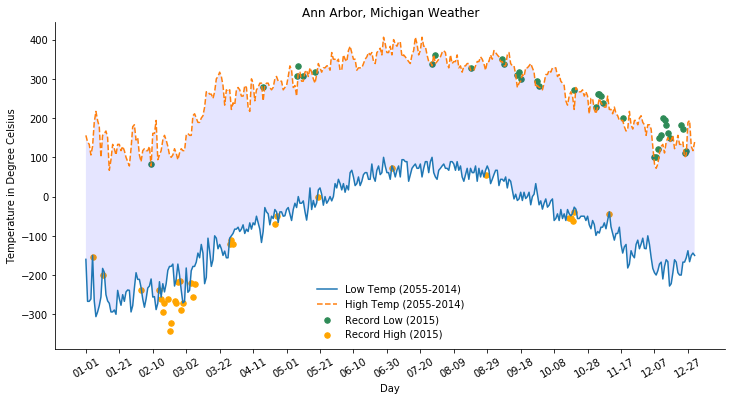

In [115]:
plt.figure(figsize = [12, 6])

# line plots for high and low temperatures over the year 2005-2014

tmin_data = np.array(tmin.Data_Value)
tmax_data = np.array(tmax.Data_Value)

plt.plot(tmin_data, '-', tmax_data, '--')

# scatter plots for high and low temperatures in 2015 when they've broken previous records 

plt.scatter(broken_tmax_2015_id, broken_tmax_2015, s = 30, c = 'seagreen', label = 'broke past high')
plt.scatter(broken_tmin_2015_id, broken_tmin_2015, s = 30, c = 'orange', label = 'broke past low')

# making the frame nice! 

plt.xlabel('Day')
plt.ylabel('Temperature in Degree Celsius')
plt.title("Ann Arbor, Michigan Weather")
plt.legend(['Low Temp (2005-2014)', 'High Temp (2005-2014)', "Record Low (2015)", "Record High (2015)"], frameon = False)

# fill the area between the tmin_data and tmax_data

plt.gca().fill_between(range(len(tmin_data)), 
                       tmin_data, tmax_data, 
                       facecolor='blue', 
                       alpha=0.1)

# labelling ticks

plt.xticks(range(0, len(tmin), 20), tmin.index[range(0, len(tmin), 20)], rotation = '30')

# removing the frame

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()